<a href="https://colab.research.google.com/github/ev1025/DA_Study/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%B8%EB%93%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

## Datetime

**strftime** : datetime형식을 문자열 형식으로

**strptime** : 문자열형식의 날짜를 datetime형식으로

**공식문서**: https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior

**Pandas**   
https://mindscale.kr/course/pandas-basic/datetime/   
https://durian9s-coding-tree.tistory.com/8

In [ ]:
# 날짜 -> 문자
import datetime
날짜형식.strftime('%Y-%m-%d %H:%M:%S') # 연월일 시분초

In [ ]:
# 문자 -> 날짜
import datetime
datetime.datetime.strptime('2023-01-24', '%Y-%m-%d')

datetime.datetime(2023, 1, 24, 0, 0)

In [ ]:
df['날짜컬럼'].dt.year # 연도 정보
df['날짜컬럼'].dt.month # 월 정보
df['날짜컬럼'].dt.day # 일 정보
df['날짜컬럼'].dt.hour # 시간 정보
df['날짜컬럼'].dt.minute # 분 정보
df['날짜컬럼'].dt.second # 초 정보

In [ ]:
# df -> datetime
df = pd.to_datetime(df, format='%H:%M', )

In [ ]:
# 기간구하기
x = 날짜데이터
diff = x - pd.to_datetime('2020-02-12 15:39')
diff.days

In [ ]:
# 날짜에 기간 더하기 x에 15일 더하면?
x + pd.Timedelta(days=15)

### Dataframe(문자열,내장함수 혼재)

In [ ]:
import pandas as pd

df = pd.DataFrame([[1,2],[3,4]],columns = ['컬럼1','컬럼2'],index=['행1','행2'])
df

,컬럼1,컬럼2
행1,1,2
행2,3,4


In [ ]:
# csv파일 불러오기
df = pd.read_csv('url',sep='구분기호', encoding='코드') # euc-kr
# usecols=['컬럼이름','컬럼이름']  # 일부 컬럼만 불러오기
# skiprows=5 or [1,2,3,4,5]        # 위에서 5열 빼고 불러오기
# nrows = 3                        # 위에서 3열 불러오기
# index_col = '컬럼명' or 컬럼번호 # 해당 컬럼을 인덱스로 사용
# names = ['컬럼1','컬럼2']        # 컬럼이름을 변경
# header = None or 0               # 컬럼명이 없는 자료라면 None 첫번째행을 컬럼명으로 쓸거면 0
# parse_dates = ['컬럼']           # datetime 컬럼 날짜형식으로 받아오기

In [ ]:
# csv파일로 저장
df.to_csv('저장할파일명.csv',index=False)

In [ ]:
# 모든 행과 열 표시
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# 샘플링을 통해 데이터 둘러보기
df['컬럼'].sample(n=,random_state=)            # 행중에 n개의 랜덤샘플 추출
df.sample(frac=0.5, replace=, random_state=)   # frac비율만큼만 랜덤샘플 추출(frac을 1이상으로해서 복원추출가능replace는 무조건True여야함)
df.sample(n=, weight='a', random_state=)       # a열이 큰 값을 기준으로 랜덤추출

In [ ]:
# 행,열 개수
df.shape
df.shape[0]
df.shape[1]

In [ ]:
# 데이터 타입, 이름, 개수 확인
df.info()

In [ ]:
# 결측치 개수 확인
df.isnull().sum()

In [ ]:
# 결측치 제거
df.dropna(axis=, how = all or any)

In [ ]:
# 중복확인
df[df.duplicated(subset=['컬럼1', '컬럼2'])]

In [ ]:
# 중복제거
df.duplicates(subset=['컬럼1', '컬럼2'])

In [ ]:
# 수치형데이터들 평균합계 등 확인
df.describe()

In [ ]:
# 데이터프레임의 카테고리 데이터를 추가하는 방법
# 한 열이 수치형 데이터 일 때, 
df['수치형 컬럼'].describe() # 데이터 범위 확인

bins = [min, 25%, 50%, 75%, max] # 최하~ 최상 구간 수 확인

# 범위에 따라 원하는 레이블명을 입력
labels = ['Low', 'Medium', 'Moderately High', 'High']

#'cut'을 통해 continuous data를 category data로 변경
df['level'] = pd.cut(x=df['수치형 컬럼'], bins=bins, labels=labels)

In [ ]:
# 분위수 구하기 (https://support.minitab.com/ko-kr/minitab/20/help-and-how-to/graphs/boxplot/interpret-the-results/quartiles/)
df.quantile(0.25)  # 일분위 
df.quantile(0.5)   # 이분위
df.quantile(0.75)  # 삼분위
df['컬럼1'].quantile(0.75) -df['컬럼1'].quantile(0.25) # 사분위 3-1분위 구간

In [ ]:
# 수치형 데이터 걸러내기
df.select_dtypes(include='object') # 범주형 데이터만 추출(object)
df.select_dtypes(exclude='object') # 수치형 데이터만 추출

,컬럼1,컬럼2
열1,1,2
열2,3,4


In [ ]:
# 유일값
df.컬럼1.unique()

array([1, 3])

In [ ]:
# 유일값 개수
df.컬럼1.nunique()

2

In [ ]:
# 컬럼, 인덱스 목록
df.columns
df.index

In [ ]:
# 컬럼,인덱스명 바꾸기
df.columns = ['이름1', '이름2']  # 모든 컬럼 다 바꿀 때
df.index = ['이름1', '이름2']  # 모든 컬럼 다 바꿀 때

df.rename(columns = {'옛이름1':'새이름1', '옛이름2':'새이름2'},inplace=True)
df.rename(index = {'옛이름1':'새이름1', '옛이름2':'새이름2'},inplace=True)

df.reindex('이름1','이름2') # 인덱스이름 지정(값이 없는인덱스는 Nan으로 채움)

In [ ]:
# loc iloc
df.iloc[0,0]
df.loc['행1','컬럼1']

df.iloc[lambda x: x.index % 2 == 0]
df.loc[df['컬럼1']>1]

,컬럼1,컬럼2
행2,3,4


In [ ]:
# 컬럼 제거
df.drop(['컬럼1','컬럼2'], axis =)

# df = df.drop(index = df[df["columns"] >= 25].index) #인덱스 25보다 큰값 제거

In [ ]:
# 열 추가(df에 컬럼3을 추가)
df.assign(컬럼3 = lambda x: x.col1+2)

**split**

In [ ]:
# str.split('기준문자', 나눌 횟수)
text = 'Hello, world, python'
strings = text.split(',', 1) # -1은 제한없음을 의미(default)
print(strings)

['Hello', ' world, python']


In [ ]:
# 데이터프레임 str.split('',expand=True)
df_data = pd.DataFrame(['2018-10-11', '2018-10-12'],columns=['data'])

# 리스트로 만들기
df_data_1 = df_data['data'].str.split('-')
print(df_data_1)
print('-----------------------------------')

# 데이터프레임에 넣어주기
df_data[['연','월','일']]= df_data['data'].str.split('-', expand=True)
df_data

0    [2018, 10, 11]
1    [2018, 10, 12]
Name: data, dtype: object
-----------------------------------


,data,연,월,일
0,2018-10-11,2018,10,11
1,2018-10-12,2018,10,12


In [ ]:
# 함수를 iterator에 적용(순서대로)
from functools import reduce
# reduce(함수, iterator) 
print(df)
print('---------')
reduce(lambda x,y : x+y, [df['컬럼1'],df['컬럼2']]) # 컬럼값 합치기

    컬럼1  컬럼2
행1    1    2
행2    3    4
---------


행1    3
행2    7
dtype: int64

**query**

In [ ]:
# 쿼리
df.query('컬럼1 == 0'and'컬럼2==3')
df[(df['컬럼1']==0) & (df['컬럼2']==3)] # and, or 안됨

# df[df['컬럼1'].insull() | df['컬럼2].insull() | df['컬럼3].isnull()]

In [ ]:
# 그룹바이(유저번호로 묶어서 누적주문,주문시간의 합을 출력)
df.groupby('유저번호')['누적주문','주문시간'].sum()
df.groupby(['quality','color']).sum() # 왼쪽(quality가 묶임)
df.groupby(['quality','color'], as_index = False).sum() # 오른쪽, 인덱싱 여부를 결정

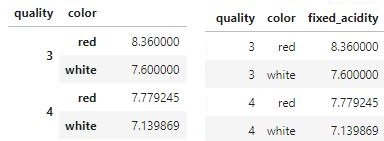

**groupby**

In [ ]:
df.groupby('컬럼')['컬럼'] = > Series
df.groupby('컬럼')[['컬럼']] = > dataframe

In [ ]:
# 데이터 일치 여부를 bool로 출력
# Series : index의 값이 일치 = True
# Dataframe : index와 columns의 값이 일치 = True
# Dict = Key(columns)의 value값이 일치 = True

df.isin(values) # values에 시리즈,데이터프레임,딕셔너리 넣으면 됨
df.isin([1,3])  # list를 넣으면 해당 인자값이 있는 곳에 True 반환

df[df.index.isin(is_null.index)] # null값만 모은 데이터의 인덱스를 가져와서 null데이터만 출력

**padding**

In [ ]:
# 왼쪽으로 채울글자를 n만큼 채워줌
str.pad(n, fillchar='채울글자')

In [ ]:
# zfill(숫자) 왼쪽으로 0을 채워줌, 마이너스를 맨 왼쪽으로 이동
print('38'.zfill(5))
print('-38'.zfill(5))

00038
-0038


In [ ]:
# rjust, ljust, 왼쪽 오른쪽 선택해서 원하는 글자를 채워줌, 마이너스위치그대로
print('38'.rjust(5,'a'))
print('-38'.rjust(5,'a'))

aaa38
aa-38


**strip**

In [ ]:
# strip() 문자열의 공백이나 매개변수를 제거
# lstrip() 왼쪽만 제거, rstrip() 오른쪽 제거

str1 = "****Welcome to Entity05****" # 양쪽 제거
after_strip = str1.strip("*")
print(after_strip)

str2 = "Welcome to Entity05"        
after_strip1 = str2.strip("05")
print(after_strip1)

str3 = "Welcome to Entity05"         # 문장 중간의 값인 to는 제거하지 않음
after_strip3 = str3.strip("to")
print(after_strip3)

Welcome to Entity05
Welcome to Entity
Welcome to Entity05


**정렬**

In [ ]:
# 값의 개수(False), 비율(True)
df.value_counts(normalize=False, ascending=True)

컬럼1  컬럼2
1    2      1
3    4      1
dtype: int64

In [ ]:
# by순서로 정렬
df.sort_values(by=['컬럼1','컬럼2'])

In [ ]:
# 인덱스를 숫자로 초기화 시키고 column에 추가
df.reset_index(drop=True)

In [ ]:
# 컬럼1을 인덱스로 
df.set_index('컬럼1',inplace=True)

In [ ]:
# 순서 지정 정렬
# 내가 원하는 순서대로 정렬하도록 바꾸는 법
yoil_dict = {'월':0,'화':1,'수':2,'목':3,'금':4,'토':5,'일':6}

group_day['yoil'] = sorted(group_day['yoil'], key=lambda x : yoil_dict[x])

In [ ]:
# 인덱스 순서 지정
df.reindex(['월','화','수','목','금','토','일'])

**피벗 테이블**

In [ ]:
df.pivot_table(index='', columns='', values='개수값', aggfunc=lambda x: len(x)/1000).fillna(0) # aggfunc는 값에 적용해줄 함수

#### **데이터합치기**

In [ ]:
import pandas as pd
df_sum1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df_sum2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

##### **concat**

In [ ]:
df_concat0 = pd.concat([df_sum1,df_sum2], axis=0)
df_concat0

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [ ]:
df_concat2 = pd.concat([df_sum1,df_sum2], axis=1)
df_concat2

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


##### **merge**

In [ ]:
# 데이터 합치기
'''
left : df1를 기준으로 df2에 Nan 표시
right : df2를 기준으로 df1에 Nan 표시
inner : 교집합만 표시 (기본값)
outer : 모든 값 표시
'''
pd.merge(df1,df2, how='inner',on='기준컬럼')

In [ ]:
df_merge = pd.merge(df_sum1, df_sum2, how='outer')
df_merge

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [ ]:
# merge 여러개 => 요런식 ((df1 +df2) +df3)+df4)
from functools import reduce
data = [df1,df2,df3]
reduce(lambda x,y : pd.merge(x,y), data)

##### **join**

In [ ]:
df_join = df_sum1.join(df_sum2, how='right', lsuffix='1', rsuffix='2')
df_join

,a1,b1,c1,a2,b2,c2,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [ ]:
# List -> 문자열로 합치기
df_abc = ['a','b','c']

print(''.join(df_abc))
print('_'.join(df_abc))
print("띄고\n".join(df_abc))

abc
a_b_c
a띄고
b띄고
c


##### **melt**

In [ ]:
# pd.melt(데이터, 
#         id_vars=['열1','열2'],     # 기준이 될 열
#         value_vars=['열3','열4'],  # 값으로 넘어갈 열
#         var_name = '열제목',       # 값으로 넘어간 열의 열제목이 들어가는 컬럼 제목
#         value_name = '값제목')     # 값으로 넘어간 열의 값들의 제목

df_melt = pd.DataFrame({'나이':['41','42','43','44'],
                       '성별':['남','남','여','여'],
                       '스타':[1,2,3,4],
                       'YG':['아이유','BTS','현빈','손예진'],
                       'SM':['장동건','고소영','이나영','원빈']})
df_melt # 밑에 결과값 참고

,나이,성별,스타,YG,SM
0,41,남,1,아이유,장동건
1,42,남,2,BTS,고소영
2,43,여,3,현빈,이나영
3,44,여,4,손예진,원빈


In [ ]:
df_melt = pd.melt(df_melt,
                  id_vars = ['나이','성별','스타'],
                  value_vars = ['YG','SM'],
                  var_name = '소속사', # 기존열 이름
                  value_name='이름')   # 기존값 이름
df_melt

,나이,성별,스타,소속사,이름
0,41,남,1,YG,아이유
1,42,남,2,YG,BTS
2,43,여,3,YG,현빈
3,44,여,4,YG,손예진
4,41,남,1,SM,장동건
5,42,남,2,SM,고소영
6,43,여,3,SM,이나영
7,44,여,4,SM,원빈


### Serise

In [ ]:
Sr_1 = pd.Series([1,2],index=['행1','행2'])
Sr_1

행1    1
행2    2
dtype: int64

In [ ]:
# Series to DateFrame
Sr_2 = Sr_1.to_frame('열1')
Sr_2

,열1
행1,1
행2,2


In [ ]:
Sr_1.index

Index(['열1', '열2'], dtype='object')

In [ ]:
Sr_1.index.values

array(['열1', '열2'], dtype=object)

In [ ]:
list(Sr_1.index.values)

['열1', '열2']

In [ ]:
Sr_1.values

array([1, 2])

In [ ]:
# 멀티인덱싱 Series를 Data프레임으로 바꾸는 법
Sr_4 = Sr_1.unstack()

### Dict

In [ ]:
# dict 합치기
dict3 = dict(dict1,**dict2)

## Numpy

In [ ]:
# 반복함수
np.repeat('A',5) # A를 5개 가진 배열 생성

In [ ]:
# 시작, 끝점을 num개로 나눈 1차원 배열(끝점을 포함, 간격표시하지않음)
np.linspace(start, stop, num, endpoint=True, retstep=False)

In [ ]:
# np.where(조건, 참값,거짓값)
import numpy as np

a = np.arange(5, 15) # array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# 1차원 데이터
print(np.where(a > 10)) # 만족하는 인덱스 출력 -> (array([6, 7, 8, 9]),)
print(np.where(a > 10, True, False)) # 만족하는 값은 True로 아닌값은 False로

(array([6, 7, 8, 9]),)
[False False False False False False  True  True  True  True]


In [ ]:
# 2차원데이터 (axis가 (0,0), (0,2),(1,0)인 값의 인덱스를 나타내는 것) 
b = np.array([[15, 8, 12], [11, 7, 3]])
np.where(b > 10) # (array([0, 0, 1]),  => axis=0의 인덱스
                 #  array([0, 2, 0]))  => axis=1의 인덱스

(array([0, 0, 1]), array([0, 2, 0]))

## 그래프

- boxplot : 데이터의 사분위수, 최소값,최대값, 이상치 확인 (수치형 데이터)

- barplot : 데이터를 비교하는데 유용한 시각화, 데이터빈도, 비율 (범주형데이터)

- scatterplot : 두 변수간 관계를 확인 (수치형 - 수치형)

In [ ]:
# 한글 그래프 폰트(plt.rc('font', family='NanumBarunGothic'))
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# rc는 한 번만 적용하면 모든 그래프에 적용된다는 장점이자 단점이 있다.
plt.rc('font', family ='글꼴') 
plt.rc("font", family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False) # 한글로 바꾸면 마이너스표시가 안뜰때 처리방법
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [ ]:
# plt 그래프 화질조정1
%config InlineBackend.figure_format='retina'

# plt 그래프 화질조정2
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [ ]:
# x축은 시간, y축은 요일 이런식의 피벗테이블에서 사용가능
plt.figure(figsize=(20,10))

data = df.pivot_table(index='', columns='', values='개수값', aggfunc=lambda x: len(x)/1000).fillna(0) # aggfunc는 값에 적용해줄 함수

sns.heatmap(data, annot=True, linewidths=0.5, fmt = '.2f', cmap='YlGnBu')
plt.yticks(len(range(df.index)), df.index, rotation='horizontal')
plt.ylabel('요일',rotation='horizontal', labelpad=30, fontsize=20)
plt.xlabel('주문시간', labelpad=15, fontsize=20)
# 히트맵 y축 맞추기
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('요일별 주문 시간',pad=20)

plt.show();

In [ ]:
# 그래프 .plot
df.plot(kind='bar', 
        title='Average Wine Quality by Color',
        fontsize=13, 
        color=['red', 'blue'],
        alpha=0.4);                           

In [ ]:
# plt.scatter(index없이 column이름만 있는 데이터에서 사용)
plt.scatter(x, y, 
            alpha = 0~1,  # 투명도
            s = z         # 마커의 크기 (x가 요일 y가 시간이면 z는 판매량)
            c = z         # 마커의 색상
            cmap='blues' or 'rainbow' or 'viridis'
            vmin=0, vmax=최대길이) # 컬러바 범위 조절

plt.gca().invert_yaxis() # y축 오름차순
plt.colorbar()       # 오른쪽에 범위 바 생성
plt.clim(0,최대길이) # vmin vmax와 동일

23번문제부터

## 내장함수

**zip**

In [ ]:
# 같은 크기의 리스트를 묶어주는 함수(여러개도 묶을 수 있음 zip(a,b,c,d))
# 크기가 모자한 것은 제거(a = 5개고 a[1:]는 4개니까 4개만 출력되는 것을 볼 수 있음)
a=[1,3,2,5,4]
for p1, p2 in zip(a,a[1:]):
	print(p1, p2)

1 3
3 2
2 5
5 4


**append, extend**

In [ ]:
# append - 데이터 형태를 보존하여 삽입
# extend - 데이터 형태를 보존하지 않고 인자별로 삽입
list1 = [1,2,3]
list2 = {4,5,6}
lsit3 = 7,8,9

list1.append(list2)
print(f'append : {list1}')

list1.extend(lsit3)
print(f'extend : {list1}')

append : [1, 2, 3, {4, 5, 6}]
extend : [1, 2, 3, {4, 5, 6}, 7, 8, 9]


In [ ]:
# 데이터프레임에서 concat과 같은 방법
df1.append(df2, ignore_index=True)
df1.concat(df2)

[1, 2, 3, [4, 5, 6], 4, 5, 6, 4, 5, 6]

In [ ]:
# .agg : 함수적용
df.agg({'price': np.mean, 'quantity': np.sum}) # price컬럼에 평균, quantity컬럼에 합계 적용

In [ ]:
# apply: 함수적용
df.apply(함수, axis=0) # column별 함수적용(default)
df.apply(함수, axis=1) # rows별 함수적용

In [ ]:
# key값과 완전 일치하는 것만 변경
df.replace({'male':'남', 'female':'여'})
df.replace( ['male','female'], [0, 1])  # male -> 0 / female -> 1 한 번에 변형

# 포함된 값 모두 변경 (str의 의미는 Series 전체에 적용됨을 의미)
df.str.replace('a','b')         # a가 포함된 것들 모두 b로 바꿈
df.str.replace('[_!.\d+]', '')  # []안의 문자 모두 ''로 바꿈
df.str.replace(r'[^a-zA-Z]', '', regex=True)

In [ ]:
# 정규표현식이 포함된 값 가져오기
df.str.extract('(\d+)')

In [ ]:
# 포함된 값 bool형태로 불러오기
df.str.contains(' ',na=True)  #  Nan값을 치환하려면 na=bool값

In [ ]:
# 각 데이터 접두사, 접미사 추가
df['col'] = df['col'].astype('str') + '접미사'
df['col'] = '접두사' + df['col'].astype('str')

In [ ]:
# loc 사용 예시

# 잘못된 예
for i in range(len(df)):
    df['col'][i] = df['col'][i].strftime('%m')

# 좋은 예
for i in range(len(df)):
    df.loc[i,'col'] = df.loc[i,'col'].strftime('%m')

## 정규표현식

In [ ]:
# 데이터프레임의 전화번호 정리하기
import re

def convert(phone_number):
  phone_number = re.sub(r"\D", "", phone_number)[-8:]
  final_number = '010' + '-' + phone_number[:4] + '-' + phone_number[-4:]
  return final_number

df.전화번호 = df.전화번호.apply(convert)

## For문 

In [ ]:
# df.shape이 (n,k)일 때
# df행별로 값을 묶어줄 때
records=[]
for i in range(len(df)): # len(df) = n
    records.append([df.values[i,j] for j in range(len(df.columns))]) # len(df.columns) = k

## 분류모델

#### 연관성분석(association rule)

In [ ]:
# 1. 데이터프레임을 이중리스트로 만들기
# 주문번호 별 주문 리스트 나누기(한 번 주문 할 때 어떤 물건을 같이 사는지 확인하기 위해서)

# 연관규칙분석을 위해 요소 비교를 하는 과정에서 시간이 오래걸려서 리스트 대신 array를 사용하였다.
# 하나의 iterator 요소간 비교에서 zip 함수를 사용 할 수 있었다.
# 마지막 열은 record에 append 되지 않는 점을 확인하여 if문을 하나 더 추가하여 마지막 열 추가

df_array = df.values # 전체 데이터를 array화 하여 계산속도 증가

record = [] # 주문번호 별 주문내역리스트
record2 =[] # 한 주문에 포함 된 내역

for p1, p2 in zip(df_array, df_array[1:]): # 0과1 1과2 ... 비교하도록 for문 

    if p1[0]==p2[0]:              # 주문번호가 같으면 record2에 추가
        record2.append(p1[2])

        if p1[2]==df_array[-2][2]: # 전체데이터의 마지막열에 도달하면 마지막 주문내역 record에 추가
            record2.append(p2[2])
            record.append(record2)
  
    else:
        record2.append(p1[2])    # 주문번호가 다르면 해당 주문의 마지막 물건이다. 주문번호 마지막 목록을 record2에 추가하고
        record.append(record2)   # 해당 주문을 그룹화한 record2를 record에 추가하고
        record2 = []             # record2를 초기화

**surpport (지지도)**
- $P(A∩B)$ 
- A,B가 동시에 일어난 수 / 전체 거래 수
- A와 B가 동시에 거래되는 비중 

**confidence (신뢰도)**
- $P(A∩B)/P(A)$
- A,B가 동시에 일어난 수 / A가 일어난 수
- A를 포함하는 거래 중 A,B가 동시에 거래되는 비중

**lift(향상도)**
- $P(A∩B) / P(A)*P(B)$  = $P(B|A) / P(B)$
- A,B가 동시에 일어난 수 / 독립된 A * 독립된 B
- AB, AC가 같은 신뢰도를 가질 때, B와 C 중 어느것이 더 관련있는지
- (lift = 1) 독립 / (lift > 1) 양의 상관관계 / (lift < 1) 음의 상관관계  

> **Tip**   
1. 지지도,신뢰도, 향상도가 모두 높다 = 좋은 rule
2. 지지도가 낮고 신뢰와 향상도가 높다 = 실효성이 떨어짐

##### **apriori공식문서** : http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [ ]:
# 2. 이중리스트로 만든 df를 원핫인코딩 형태로 바꿔줌(컬렴명 = 제품명, 값 = 0이나 1 값)
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(record).transform(record) # fit = 고유한 라벨을 갖게됨 / transform = 원핫인코딩,numpy배열로 전환
ap_data = pd.DataFrame(te_ary,columns=te.columns_) # 원핫 인코딩 된 데이터프레임으로 변환

In [ ]:
# 3-1. 원하는 support를 설정하여 연관분석 시행
# 데이터용량이 커서 메모리부족현상발생 시 ->FP-growth 알고리즘 사용
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(ap_data, min_support=0.1, use_colnames=True) # 지지도 확인용
frequent_itemsets_chart = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1) # 지지도,신뢰도,향상도 등등 확인

#####TPgrowth

In [ ]:
# 3-2. 위의 3-1이 안될 경우 사용
%pip install mlxtend --upgrade

In [ ]:
# import에러 발생하여 mlxtend 버전업그레이드 진행
# apriori보다 빠르다.
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(ap_data, min_support=0.01, use_colnames=True)
result_chart = association_rules(result, metric='confidence',  min_threshold=0.01)

#### K-Means

In [ ]:
# 1. 데이터 스케일링
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_model = df[['누적주문','주문텀']] # 데이터중 필요한 것만 뽑아서(수치형)
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(df_model)

In [ ]:
# 2. 스케일링된 데이터로 Elbow Method 사용하여 적절한 k 측정
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(sc_data)
# 파란색 선 : 군집의 중심에서의 평균거리
# 초록색 선 : 계산에 걸린 시간
# 검은색 선 : 적정 k

In [ ]:
k = 2
model = KMeans(n_clusters=k, random_state=12)
model.fit(sc_data)

df['cluster'] = model.fit_predict(sc_data)

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12,8))
for i in range(k):
    plt.scatter(df.loc[df_graph['cluster']==i, '누적주문'], 
                df.loc[df_graph['cluster']==i, '주문텀'])
plt.xlabel('누적주문')
plt.ylabel('주문텀')
plt.legend(['고객1', '고객2'])
plt.show();